<a href="https://colab.research.google.com/github/FlorianGelb/GNNProject/blob/K_sparse/Evaluation_for_k_SAE_nonoise_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader, random_split, Subset
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import numpy as np

%matplotlib inline

In [ ]:
from K_SAE import Net,plot

In [ ]:
sequence = [50 - 5 * i for i in range(10)]
layers=[28*28,128,64,50]
models_MNIST={str(k): Net(layers,k) for k in sequence}
models_FashionMNIST={str(k): Net(layers,k) for k in sequence}

In [ ]:
for k in models_MNIST:
    checkpoint = torch.load(f'SavedModels/withoutnoise_MINST_weights_{k}_Relu.pth')
    models_MNIST[k].load_state_dict(checkpoint)

    checkpoint = torch.load(f'SavedModels/withoutnoise_FashionMINST_weights_{k}_Relu.pth')
    models_FashionMNIST[k].load_state_dict(checkpoint)




In [ ]:
transform = transforms.ToTensor()
dataset = datasets.MNIST("./", download=True,transform = transform)
dataset_fashion=datasets.FashionMNIST("./", download=True,transform = transform)

In [ ]:
train_dataset, test_dataset = random_split(dataset, [50000, 10000])
test_loader = DataLoader(test_dataset, batch_size=64)

train_dataset_fashion, test_dataset_fashion = random_split(dataset_fashion, [50000, 10000])
test_loader_fashion = DataLoader(test_dataset_fashion, batch_size=64)

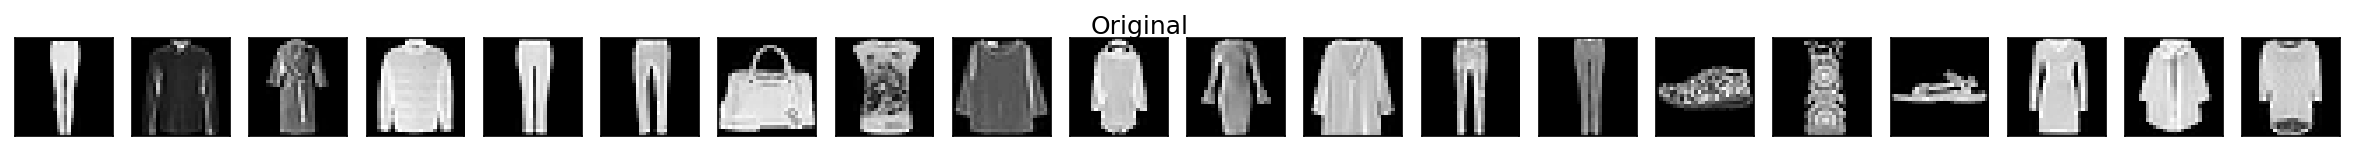

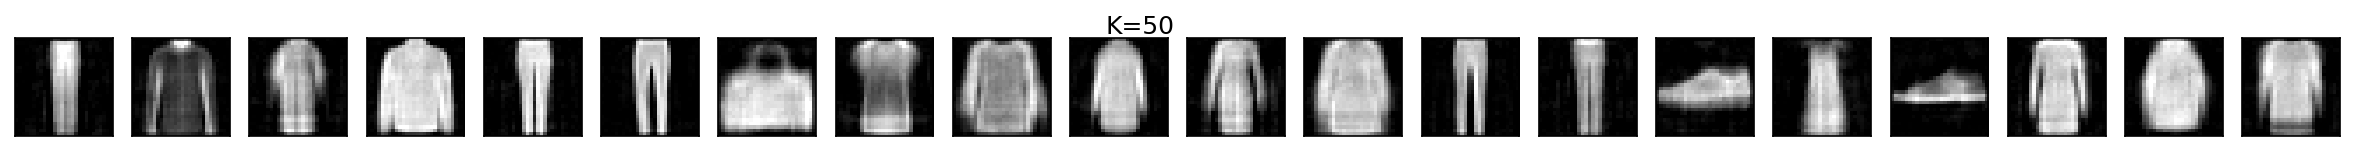

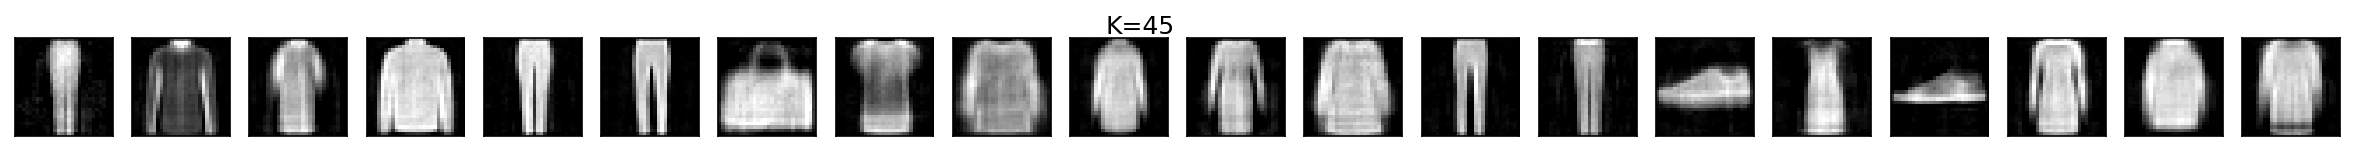

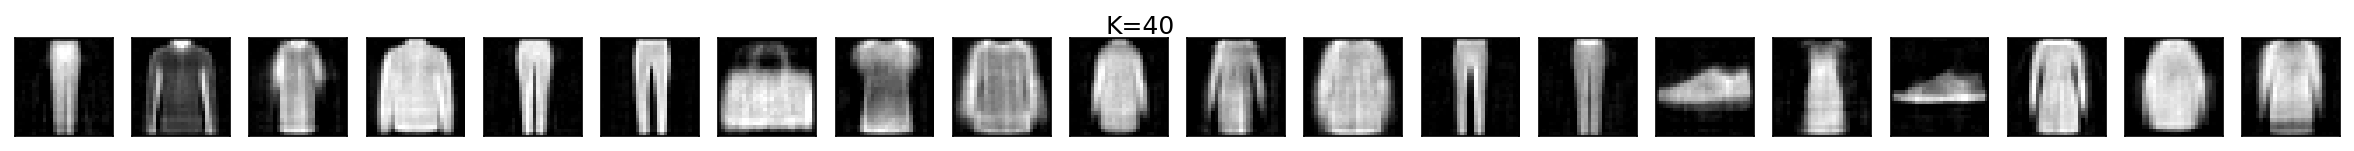

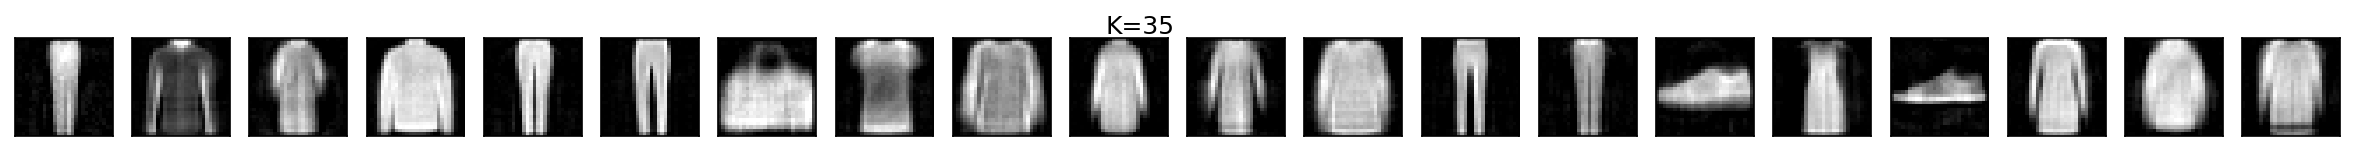

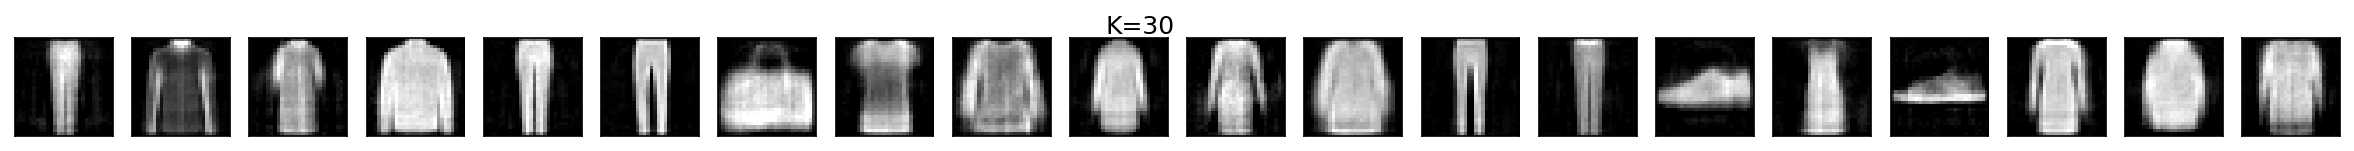

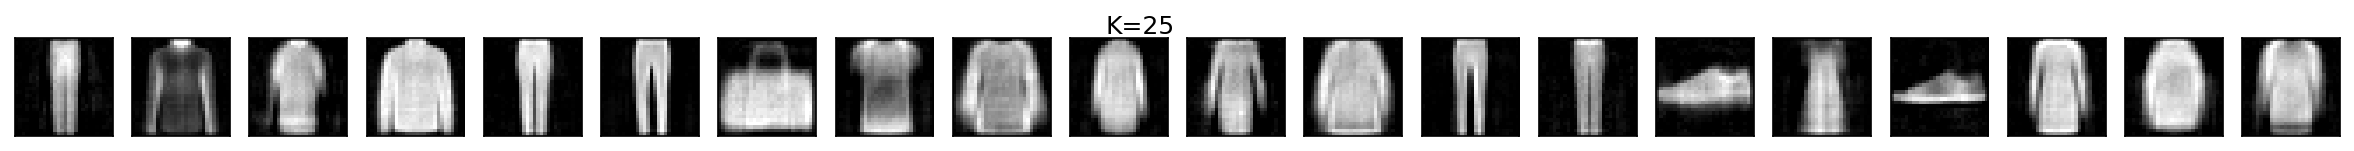

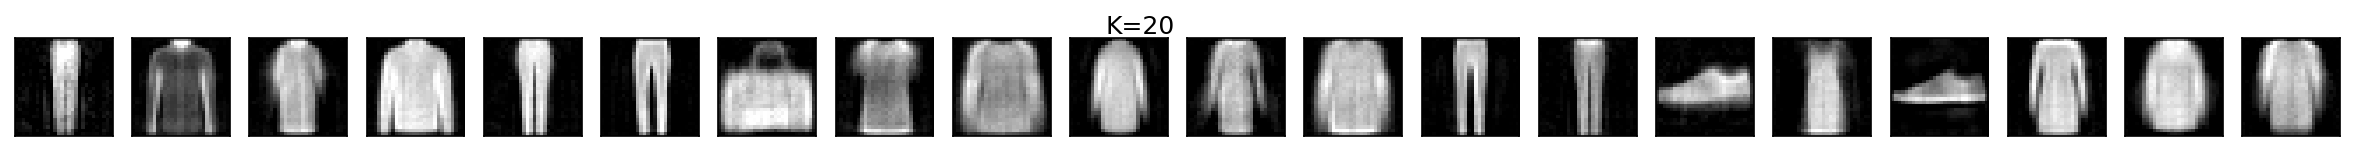

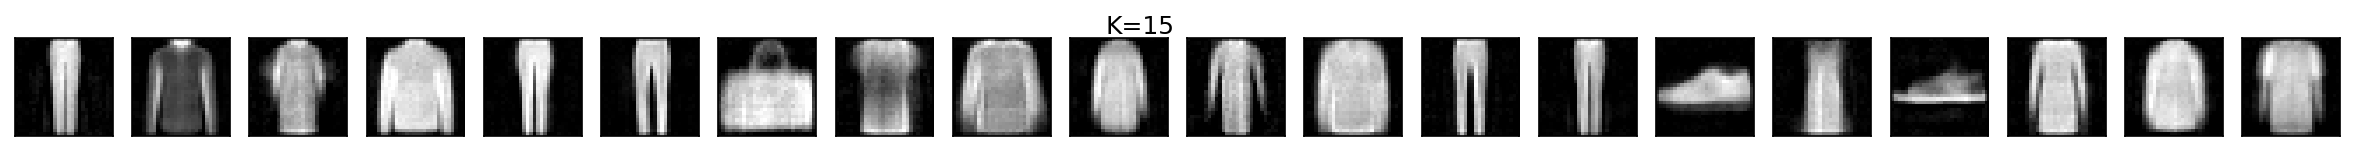

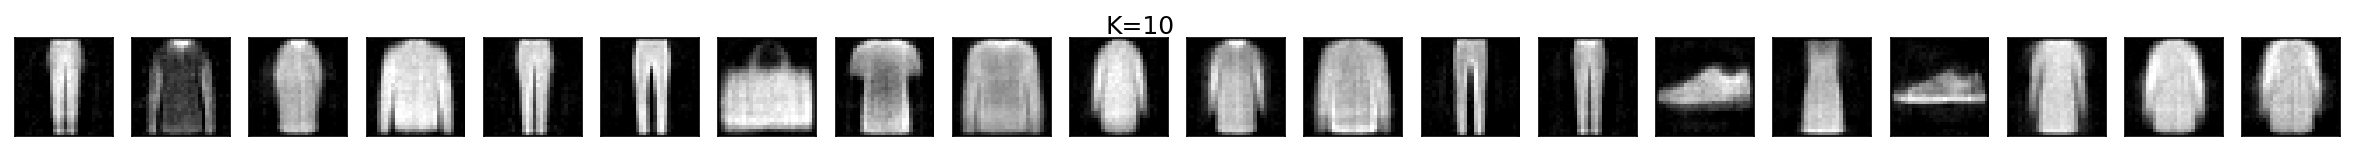

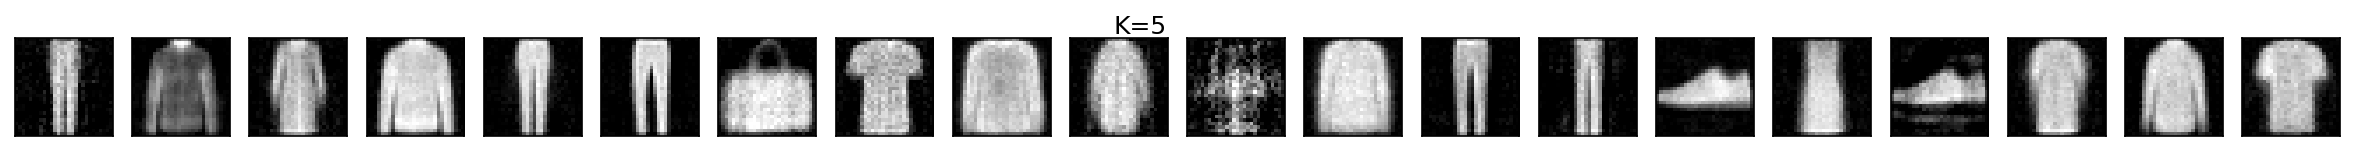

In [ ]:
plot(models_FashionMNIST,test_loader_fashion,(1,20))

In [ ]:
import pickle

with open("Classifiers/MNISTClassifier.pkl", "rb") as f:
    mnist_classifier = pickle.load(f)
with open("Classifiers/FashionMNISTClassifier.pkl", "rb") as f:
    fashion_classifier = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:

def evalmodel(model, data_loader, classifier):
    accuracy_list=[]
    with torch.no_grad():

        for images, labels in data_loader:

            reconstructed = model(images)
            accuracy = classifier.score(reconstructed.detach().numpy(), labels)
            accuracy_list.append(accuracy)

    return np.mean(accuracy_list)


In [ ]:
accuracy=[]
for k in models_MNIST:
  accuracy_k=evalmodel(models_MNIST[k],test_loader,mnist_classifier)
  accuracy.append(accuracy_k)

In [ ]:
print(accuracy)

[0.9795979299363057, 0.9798964968152867, 0.9764132165605095, 0.9691480891719745, 0.964968152866242, 0.9583001592356688, 0.9353105095541401, 0.9263535031847133, 0.8707205414012739, 0.7345740445859873]


In [ ]:
accuracy_Fashion=[]
for k in models_FashionMNIST:
  accuracy_k=evalmodel(models_FashionMNIST[k],test_loader_fashion,fashion_classifier)
  accuracy_Fashion.append(accuracy_k)

In [ ]:
print(accuracy_Fashion)

[0.8711186305732485, 0.8691281847133758, 0.8640525477707006, 0.8552945859872612, 0.8554936305732485, 0.8471337579617835, 0.8382762738853503, 0.8171775477707006, 0.7465167197452229, 0.7091958598726115]


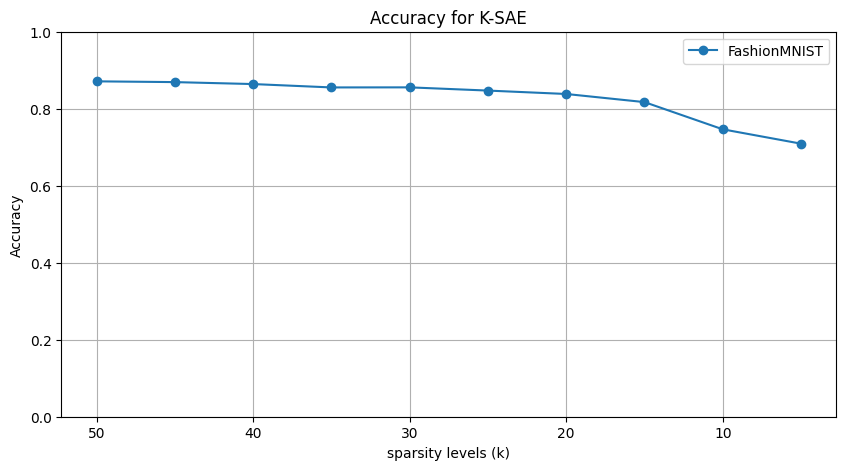

In [ ]:
import matplotlib.pyplot as plt

l = [50, 45, 40, 35, 30, 25, 20, 15, 10, 5]




plt.figure(figsize=(10, 5))
#plt.plot(l, accuracy,  '-o',label='MNIST')
plt.plot(l, accuracy_Fashion, '-o', label='FashionMNIST')




plt.title('Accuracy for K-SAE')
plt.xlabel('sparsity levels (k)')
plt.ylabel('Accuracy')

plt.legend()
plt.grid(True)

plt.gca().invert_xaxis()
plt.ylim(0, 1)

plt.savefig('accuracy_fashionMNIST.png')
plt.show()
